
# Water Quality Prediction Data Science Project using CRISP-DM Methodology

This notebook demonstrates the process of predicting water potability using a dataset of water quality metrics. The entire process follows the CRISP-DM methodology, which includes:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

The project is divided into several stages, each of which is explained step-by-step, following the CRISP-DM approach.



## Phase 1: Business Understanding

The goal of this project is to predict whether a given water sample is potable (i.e., safe for drinking) based on a variety of water quality metrics. Potability is a binary classification indicating whether the water is suitable for consumption (`1`) or not (`0`). The objective is to create a model that accurately predicts water potability, which is crucial for public health and safety.



## Phase 2: Data Understanding

The dataset contains various water quality metrics, including:
- `ph`
- `Hardness`
- `Solids`
- `Chloramines`
- `Sulfate`
- `Conductivity`
- `Organic_carbon`
- `Trihalomethanes`
- `Turbidity`
- `Potability` (Target Variable)

We will understand the structure, data types, and check for missing values in this dataset.


In [4]:

import pandas as pd

# Load the water quality dataset
file_path = '/content/water_potability.csv'  # Change this to the correct file path
water_quality_df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
water_quality_df.head()

# Basic information about the dataset
data_info = water_quality_df.info()

# Summary statistics of the dataset
data_summary = water_quality_df.describe()

# Checking for missing values
missing_values = water_quality_df.isnull().sum()

data_info, data_summary, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


(None,
                 ph     Hardness        Solids  Chloramines      Sulfate  \
 count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
 mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
 std       1.594320    32.879761   8768.570828     1.583085    41.416840   
 min       0.000000    47.432000    320.942611     0.352000   129.000000   
 25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
 50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
 75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
 max      14.000000   323.124000  61227.196008    13.127000   481.030642   
 
        Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
 count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
 mean     426.205111       14.284970        66.396293     3.966786     0.390110  
 std       80.824064        3.308162        16.175008     0.7


## Phase 3: Data Cleaning and Preprocessing

In this phase, we address the following issues:
- **Missing Values**: Imputed using the median for `ph`, `Sulfate`, and `Trihalomethanes`.
- **Anomalies**: Replaced `ph` values of 0 with the median, as this value is unrealistic for water samples.
- **Feature Standardization**: Standardized all features to have a mean of 0 and a standard deviation of 1, which helps improve model performance.
- Finally, the dataset is split into training and testing sets for model evaluation.


In [5]:

# Data Cleaning and Preprocessing

# Handling missing values
columns_with_missing = ['ph', 'Sulfate', 'Trihalomethanes']
for column in columns_with_missing:
    water_quality_df[column].fillna(water_quality_df[column].median(), inplace=True)

# Replace ph values of 0 with median value (excluding zeros)
ph_median = water_quality_df.loc[water_quality_df['ph'] > 0, 'ph'].median()
water_quality_df['ph'] = water_quality_df['ph'].replace(0, ph_median)

# Standardize the features
from sklearn.preprocessing import StandardScaler

features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']

scaler = StandardScaler()
water_quality_df[features] = scaler.fit_transform(water_quality_df[features])

# Define features and target
X = water_quality_df.drop('Potability', axis=1)
y = water_quality_df['Potability']

# Splitting the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-5-97b16db8e3b4>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  water_quality_df[column].fillna(water_quality_df[column].median(), inplace=True)



## Phase 4: Feature Selection

Feature selection helps identify the most influential features for predicting water potability. Here, we use **RandomForest** to determine feature importance. The key features affecting potability include `Solids`, `Organic Carbon`, and `Chloramines`.


<ipython-input-6-8380aaa5f9ca>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gro

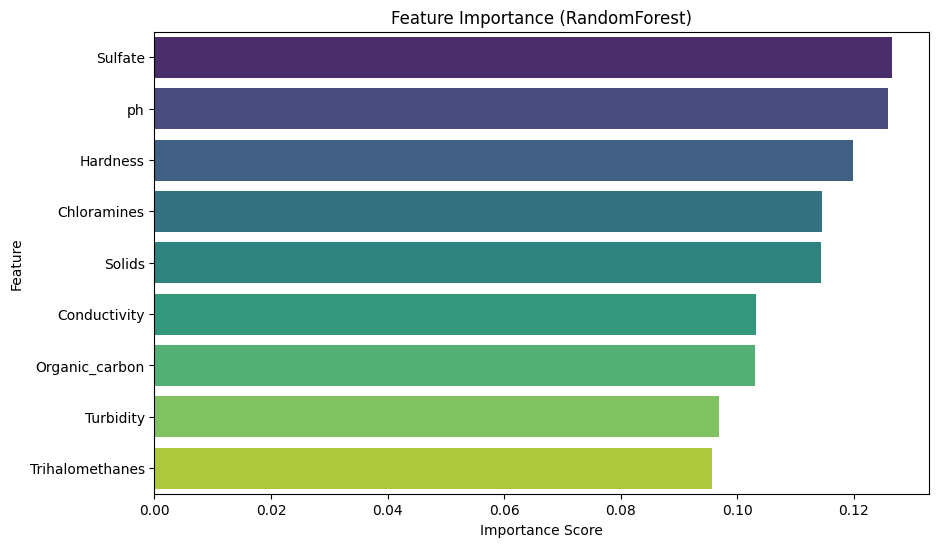

In [6]:

# Feature Selection using RandomForest
from sklearn.ensemble import RandomForestClassifier

# Fit a RandomForest model to determine feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extracting feature importance
import pandas as pd
feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

# Plotting feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance (RandomForest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()



## Phase 5: Modeling - Part 1

In this phase, we initialize and train different models to predict water potability, including:
- **RandomForest** (Manually tuned with 100 estimators and a maximum depth of 20)
- **Logistic Regression**
- **Decision Tree**

The training is performed on the prepared training data (`X_train`, `y_train`).


In [7]:

# Modeling Phase - Part 1: Model Initialization and Training

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models for comparison
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# Train models on training data
for model_name, model in models.items():
    model.fit(X_train, y_train)



## Phase 5: Modeling - Part 2: Evaluation

The models are evaluated on the test set (`X_test`, `y_test`) using the following metrics:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**

The results are displayed to compare model performance.


In [8]:

# Modeling Phase - Part 2: Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate models on the test data
results = []

for model_name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Display evaluation results
pd.DataFrame(results)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForest,0.682927,0.634328,0.348361,0.449735
1,LogisticRegression,0.628049,0.000000,0.000000,0.000000
2,DecisionTree,0.576220,0.439716,0.508197,0.471483



## Phase 6: Final Evaluation and Sample Prediction

In this phase, we evaluate the **best performing model**, which is the **manually tuned RandomForest**, using the test set (`X_test`, `y_test`). The evaluation metrics include:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**

Additionally, we perform a **sample prediction** using the best model to demonstrate its application in predicting water potability.


In [9]:

# Final Evaluation and Sample Prediction using the Best Model (RandomForest)

# Select the best model - RandomForest with manually tuned parameters
best_model = models['RandomForest']

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)

# Calculate performance metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Display evaluation results
print(f"Accuracy: {accuracy_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")

# Perform a sample prediction with the best performing model

# Select a random sample from the test set
sample = X_test.sample(1, random_state=42)

# Use the best model to predict the potability of the selected sample
sample_prediction = best_model.predict(sample)

# Retrieve the predicted result (0 = Not Potable, 1 = Potable)
sample_prediction_result = 'Potable' if sample_prediction[0] == 1 else 'Not Potable'

# Display the selected sample and the prediction result
sample_data = sample.iloc[0].to_dict()
sample_data['Predicted Potability'] = sample_prediction_result

# Print sample features and prediction result
print("Sample Features:")
for key, value in sample_data.items():
    print(f"{key}: {value}")


Accuracy: 0.68
Precision: 0.63
Recall: 0.35
F1 Score: 0.45
Sample Features:
ph: -1.7622346795597106
Hardness: 1.1505008734972433
Solids: -0.9048760699429522
Chloramines: -0.4937913860161615
Sulfate: -1.0319829512126777
Conductivity: -0.5419638676551423
Organic_carbon: 0.9277184085550357
Trihalomethanes: -0.46951675519112424
Turbidity: 1.2766375448952125
Predicted Potability: Not Potable
